In [2]:
import numpy as np
import random
import re
import time
import matplotlib.pyplot as plt
import pandas as pd
import itertools



## key_arrangement
used to sort keys  


In [10]:
def key_arrangement(key1, key2):
    """
    Arranges keys in ascending order, handling any number of '&' separators
    and alphanumeric keys, correctly sorting numeric strings.
    Args:
        key1 (str): The first key to be arranged.
        key2 (str): The second key to be arranged.
    Returns:
        str: The arranged key.
    """

    def sort_key(key):
        parts = re.split(r'(\d+)', key)
        parts[1::2] = map(int, parts[1::2])
        return parts

    keys = key1.split('&') if '&' in key1 else [key1]

    keys.append(key2)
    keys.sort(key=sort_key)

    return '&'.join(keys)

## create Lk

In [3]:
def create_Lk(L_prev, L, min_support):
    """
    Creates the Lk dictionary (frequent itemsets of length k)
    from the previous dictionary L_prev and the original list L.
    Args:
        L_prev (dict): The previous dictionary of frequent itemsets.
        L (list): The original list of transactions.
        min_support (int): The minimum support threshold.
    Returns:
        dict: The Lk dictionary of frequent itemsets.
    """

    Lk = {}

    items_prev = set()
    for key in L_prev:
        items_prev.update(key.split('&'))
    for key1 in L_prev:
        for itemset in L:
            if all(item in itemset for item in key1.split('&')):
                for item2 in set(itemset):
                    if all(item2 > item for item in key1.split('&')):
                        if item2 in items_prev:
                            new_key = key_arrangement(key1, item2)
                            Lk[new_key] = Lk.get(new_key, 0) + 1

    Lk_filtered = {k: v for k, v in Lk.items() if v >= min_support}

    return Lk_filtered

## apriori_algorithm

In [4]:
def apriori_algorithm(dataSet, numberOfItems, min_support):
  """
  Implements the Apriori algorithm to find frequent itemsets in a dataset.

  Args:
    dataSet: A list of lists representing the transaction data.
    numberOfItems: The maximum number of items in an itemset to consider.
    min_support: The minimum support threshold (as a count) for an itemset to be considered frequent.

  Returns:
    A dictionary containing the frequent itemsets and their supports.
  """

  all_item = [str(item) for sublist in dataSet for item in sublist]

  freq_item = np.unique(all_item, return_counts=True)
  freq_dict = dict(zip(freq_item[0], freq_item[1]))

  filtered_freq_dict = {k: v for k, v in freq_dict.items() if v > min_support}

  prev_L = filtered_freq_dict

  for i in range(2, numberOfItems + 1):
    L = create_Lk(prev_L, dataSet, min_support)
    prev_L = L


  return prev_L

# Testing
 ## create input list of list

In [5]:
def create_random_list_of_lists(num_lists, num_elements, min_val, max_val):
  """Creates a list of lists containing random numbers.

  Args:
    num_lists: The number of lists to create.
    num_elements: The number of elements in each list.
    min_val: The minimum value for the random numbers.
    max_val: The maximum value for the random numbers.

  Returns:
    A list of lists containing random numbers.
  """

  list_of_lists = []
  for _ in range(num_lists):
    random_list = [str(random.randint(min_val, max_val)) for _ in range(num_elements)]
    list_of_lists.append(random_list)
  return list_of_lists


In [6]:
num_lists = 30
num_elements = 8
min_val = 1
max_val = 10


In [7]:
L = create_random_list_of_lists(num_lists, num_elements, min_val, max_val)


In [ ]:
apriori_algorithm(L,5,4)

{'1&2&3&4&6': 4,
 '1&2&3&4&9': 4,
 '1&2&4&6&9': 4,
 '1&2&4&5&6': 4,
 '2&3&4&6&9': 5}

In [8]:
fruit_list_of_lists = [['pineapple', 'banana', 'kiwi', 'grape', 'watermelon'],
 ['kiwi', 'watermelon', 'apple', 'banana', 'orange'],
 ['banana', 'orange', 'strawberry', 'kiwi', 'watermelon'],
 ['orange', 'watermelon', 'pineapple', 'banana', 'strawberry'],
 ['pineapple', 'orange', 'mango', 'apple', 'watermelon'],
 ['pineapple', 'mango', 'watermelon', 'grape', 'apple'],
 ['apple', 'kiwi', 'grape', 'mango', 'strawberry'],
 ['banana', 'grape', 'pineapple', 'strawberry', 'watermelon'],
 ['kiwi', 'mango', 'banana', 'pineapple', 'orange'],
 ['watermelon', 'kiwi', 'apple', 'strawberry', 'orange'],
 ['strawberry', 'banana', 'mango', 'grape', 'kiwi'],
 ['grape', 'apple', 'orange', 'watermelon', 'strawberry'],
 ['orange', 'watermelon', 'strawberry', 'pineapple', 'banana'],
 ['mango', 'orange', 'kiwi', 'strawberry', 'watermelon'],
 ['mango', 'strawberry', 'pineapple', 'banana', 'apple'],
 ['banana', 'grape', 'kiwi', 'watermelon', 'mango'],
 ['banana', 'pineapple', 'mango', 'orange', 'apple'],
 ['grape', 'kiwi', 'mango', 'strawberry', 'apple'],
 ['orange', 'banana', 'watermelon', 'grape', 'apple'],
 ['pineapple', 'apple', 'grape', 'orange', 'mango'],
 ['kiwi', 'grape', 'strawberry', 'mango', 'orange'],
 ['grape', 'strawberry', 'banana', 'pineapple', 'kiwi'],
 ['pineapple', 'grape', 'apple', 'orange', 'kiwi'],
 ['strawberry', 'kiwi', 'banana', 'pineapple', 'apple'],
 ['watermelon', 'apple', 'pineapple', 'strawberry', 'banana'],
 ['watermelon', 'banana', 'kiwi', 'pineapple', 'orange'],
 ['watermelon', 'mango', 'apple', 'strawberry', 'grape'],
 ['strawberry', 'watermelon', 'grape', 'pineapple', 'banana'],
 ['watermelon', 'apple', 'mango', 'kiwi', 'orange'],
 ['orange', 'apple', 'grape', 'banana', 'kiwi']]

In [11]:
apriori_algorithm(fruit_list_of_lists,2,5)

{'apple&kiwi': 8,
 'apple&orange': 10,
 'apple&banana': 7,
 'apple&watermelon': 9,
 'apple&pineapple': 8,
 'apple&mango': 9,
 'apple&grape': 9,
 'apple&strawberry': 8,
 'banana&kiwi': 10,
 'banana&grape': 8,
 'banana&pineapple': 12,
 'banana&watermelon': 11,
 'banana&orange': 9,
 'banana&strawberry': 10,
 'banana&mango': 5,
 'grape&kiwi': 9,
 'grape&pineapple': 7,
 'grape&watermelon': 8,
 'grape&mango': 8,
 'grape&strawberry': 9,
 'grape&orange': 6,
 'kiwi&pineapple': 6,
 'kiwi&watermelon': 8,
 'kiwi&orange': 10,
 'kiwi&strawberry': 9,
 'kiwi&mango': 8,
 'mango&orange': 7,
 'mango&pineapple': 6,
 'mango&watermelon': 6,
 'mango&strawberry': 7,
 'orange&watermelon': 11,
 'orange&strawberry': 7,
 'orange&pineapple': 8,
 'pineapple&watermelon': 9,
 'pineapple&strawberry': 8,
 'strawberry&watermelon': 10}

# Drow a plot

In [12]:
dataset_sizes = [(10,5),(100,10),(10000,15),(100000,20)]
datasets1 = [create_random_list_of_lists(size[0], 5, 1, 10) for size in dataset_sizes]
datasets2 = [create_random_list_of_lists(1000, size[1], 1, 10) for size in dataset_sizes]

### Datasets Size


In [13]:
execution_times1 = []
for dataset in datasets1:
    start_time = time.time()
    apriori_algorithm(dataset, 5, 3)
    end_time = time.time()
    execution_times1.append(end_time - start_time)

In [14]:
execution_times2 = []
for dataset in datasets2:
    start_time = time.time()
    apriori_algorithm(dataset, 5, 3)
    end_time = time.time()
    execution_times2.append(end_time - start_time)

In [15]:
df = pd.DataFrame({'Size of Datasets': [i[0] for i in dataset_sizes], 'Execution Time (seconds)': execution_times1}).set_index('Size of Datasets')
df

,Execution Time (seconds)
Size of Datasets,
10,0.000745
100,0.027918
10000,5.682941
100000,50.681482


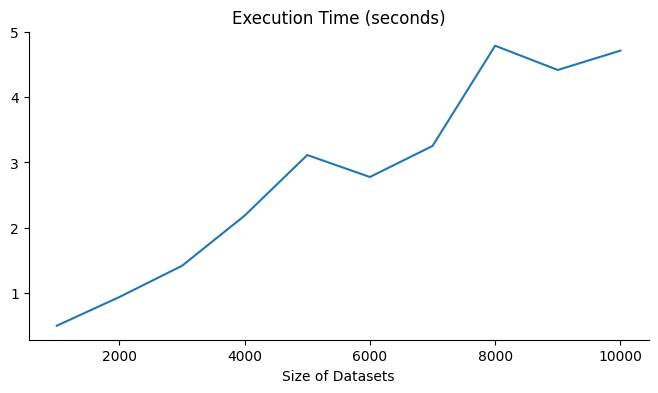

In [ ]:
# @title Execution Time (seconds)

from matplotlib import pyplot as plt
df['Execution Time (seconds)'].plot(kind='line', figsize=(8, 4), title='Execution Time (seconds)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df1 = pd.DataFrame({'Average Items per Dataset': [i[1] for i in dataset_sizes], 'Execution Time (seconds)': execution_times2}).set_index('Average Items per Dataset')
df1

,Execution Time (seconds)
Average Items per Dataset,
10,2.658576
20,6.227749
30,11.521375
40,11.073414
50,9.357906
60,10.751152
70,10.796490
80,11.556120
90,10.695939


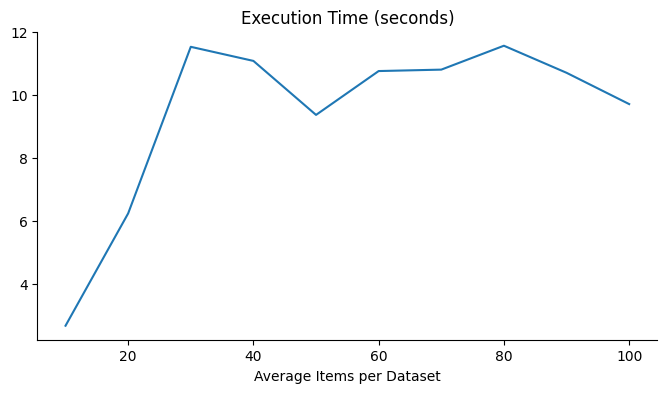

In [ ]:
# @title Execution Time (seconds)

from matplotlib import pyplot as plt
df1['Execution Time (seconds)'].plot(kind='line', figsize=(8, 4), title='Execution Time (seconds)')
plt.gca().spines[['top', 'right']].set_visible(False)

# FP-tree

In [16]:
class Tree:
    def __init__(self, name,freq):
        self.data = name
        self.freq = freq
        self.children = []

    def add_child(self, child):
        self.children.append(child)

    def print_tree(self, level=0):
        """Prints the tree structure with indentation."""
        print("  " * level + str(self.data)+" "+str(self.freq))
        for child in self.children:
            child.print_tree(level + 1)

In [17]:
def constract_tree(ordered_frequent_items):
  """
  crete a tree from  ordered frequent items and calculated frequent for each path node

  Args:
      ordered_frequent_items
  Returns:
      A tree  of ordered frequent items

  """
  _root = Tree('root', 0)
  root = _root

  for itemset in ordered_frequent_items:
     current_node = root
     for item in itemset:
        found_child = False
        for child in current_node.children:
            if child.data == item:
                child.freq += 1
                current_node = child
                found_child = True
                break

        if not found_child:
            new_child = Tree(item, 1)
            current_node.add_child(new_child)
            current_node = new_child
  return _root



In [18]:
def create_conditional_pattern_base(root, item):
    """Creates the conditional pattern base for a given item.

    Args:
        root: The root of the growth tree.
        item: The item for which to create the conditional pattern base.

    Returns:
        A list of conditional patterns (lists of items).
    """

    conditional_pattern_base = []

    def find_paths(node, current_path):
        """Recursively finds all paths leading to the target item."""
        if node.data != 'root':
           current_path.append(node.data)

        if node.data == item:
            if len(current_path) > 1:
              conditional_pattern_base.append({node.freq:current_path[:-1]})

        for child in node.children:
            find_paths(child, current_path.copy())

        if current_path:
            current_path.pop()

    find_paths(root, [])

    return conditional_pattern_base

In [19]:
def create_conditional_FP_tree(conditional_pattern_base):
  """
    Creates a conditional FP-tree from a given conditional pattern base.
    Args:
        conditional_pattern_base: dictionary representing the conditional

    Returns:
        A dictionary representing the conditional FP-tree.
  """

  def find_intersection(list_of_dicts):
         #Handle empty input
        if not list_of_dicts:
          return None

        Values = list(list_of_dicts[0].values())[0]
        sum_keys = list(list_of_dicts[0].keys())[0]

        for dictionary in list_of_dicts[1:]:
           Values = list(set(Values) & set(list(dictionary.values())[0]))
           sum_keys += list(dictionary.keys())[0]

        if Values == []:
          return None

        return {sum_keys : Values}


  conditional_FP_tree = {}
  for i in conditional_pattern_base.items():
     result = find_intersection(i[1])
     conditional_FP_tree[i[0]] = result

  return  conditional_FP_tree


In [22]:
def frequent_pattern_generation(conditional_FP_tree):
  """
    Generates frequent patterns from a given conditional FP-tree.
    Args:
        conditional_FP_tree: dictionary representing the conditional FP-tree.
    Returns:
        A list of frequent patterns.
  """
  subsets = []


  for item in conditional_FP_tree.items():
    if item[1] is not None:

      input_set = list(item[1].values())[0]
      if input_set:
        for i in range(1, len(input_set) + 1):
          for subset in itertools.combinations(input_set, i):

              subsets.append(set([item[0]]) | set(subset)) # Change here

  return subsets

In [20]:
def FP_growth(dataset, minimum_support):
  """
  FP-growth algorithm implementation.

  Args:
    dataset: list of lists
    minimum_support: int

  Returns:
    A list of frequent patterns.
  """

  all_item = [str(item) for sublist in dataset for item in sublist]
  freq_item = {}
  for item in all_item:
    if item not in freq_item:
      freq_item[item]=1
    else:
      freq_item[item]+=1

  filterd_freq_item = {key: value for key, value in freq_item.items() if value >= minimum_support}
  frequent_pattern_set = dict(sorted(filterd_freq_item.items(), key=lambda x: x[1], reverse=True))

  ordered_frequent_items =[]
  for itemset in dataset:
     frequent_items_in_itemset = [item for item in frequent_pattern_set.keys() if item in itemset]
     ordered_frequent_items.append(frequent_items_in_itemset)

  tree = constract_tree(ordered_frequent_items)

  Q = {}
  for item in frequent_pattern_set.keys():
    Q[item] = create_conditional_pattern_base(tree, item)



  return frequent_pattern_generation(create_conditional_FP_tree(Q))


In [23]:
Fexecution_times1 = []
for dataset in datasets1:
    start_time = time.time()
    FP_growth(dataset,3)
    end_time = time.time()
    Fexecution_times1.append(end_time - start_time)


In [25]:

sizes = [size[0] for size in dataset_sizes]

df = pd.DataFrame([Fexecution_times1, execution_times1], columns=sizes, index=['FP-Growth', 'Apriori'])
(df)

,10,100,10000,100000
FP-Growth,0.000210,0.001266,0.041789,0.648257
Apriori,0.000745,0.027918,5.682941,50.681482


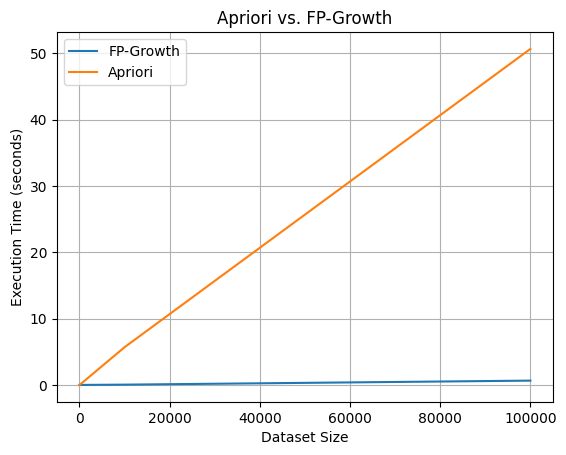

In [26]:
import matplotlib.pyplot as plt
import pandas as pd


df_transposed = df.T

plt.plot(df_transposed.index, df_transposed['FP-Growth'], label='FP-Growth')
plt.plot(df_transposed.index, df_transposed['Apriori'], label='Apriori')

plt.xlabel('Dataset Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Apriori vs. FP-Growth')
plt.legend()
plt.grid(True)

plt.show()

In [27]:
execution_times2 = []
for dataset in datasets2:
    start_time = time.time()
    FP_growth(datasets2,3)
    end_time = time.time()
    execution_times2.append(end_time - start_time)